In [1]:
# Add Matplotlib 
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

In [2]:
# File to Load (Remember to change these)
Diabetes_raw_data_load = "Results/diabetes_raw_data.csv"

# Read the City and Ride Data
Diabetes_data_df = pd.read_csv(Diabetes_raw_data_load)

In [3]:
# Display the data table for preview
Diabetes_data_df.head()

,Unnamed: 0,Diabetes_Status,HighBP,HighChol,CholCheck,BMI_Range,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,Mental_Health_Range,Physical_Health_Range,DiffWalk,Sex,Age,Education,Income
0,0,1,1.0,1.0,1.0,4,1.0,0.0,0.0,0.0,...,1.0,0.0,5.0,4,3,1.0,0.0,9.0,4.0,3.0
1,1,1,0.0,0.0,0.0,3,1.0,0.0,0.0,1.0,...,0.0,1.0,3.0,1,1,0.0,0.0,7.0,6.0,1.0
2,2,1,1.0,1.0,1.0,3,0.0,0.0,0.0,0.0,...,1.0,1.0,5.0,6,6,1.0,0.0,9.0,4.0,8.0
3,3,1,1.0,0.0,1.0,3,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,1,1,0.0,0.0,11.0,3.0,6.0
4,4,1,1.0,1.0,1.0,2,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,1,1,0.0,0.0,11.0,5.0,4.0


In [4]:
Diabetes_data_df.columns

Index(['Unnamed: 0', 'Diabetes_Status', 'HighBP', 'HighChol', 'CholCheck',
       'BMI_Range', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity',
       'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare',
       'NoDocbcCost', 'GenHlth', 'Mental_Health_Range',
       'Physical_Health_Range', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [5]:
Diabetes_data_df.dtypes

Unnamed: 0                 int64
Diabetes_Status            int64
HighBP                   float64
HighChol                 float64
CholCheck                float64
BMI_Range                  int64
Smoker                   float64
Stroke                   float64
HeartDiseaseorAttack     float64
PhysActivity             float64
Fruits                   float64
Veggies                  float64
HvyAlcoholConsump        float64
AnyHealthcare            float64
NoDocbcCost              float64
GenHlth                  float64
Mental_Health_Range        int64
Physical_Health_Range      int64
DiffWalk                 float64
Sex                      float64
Age                      float64
Education                float64
Income                   float64
dtype: object

In [6]:
Diabetes_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             253680 non-null  int64  
 1   Diabetes_Status        253680 non-null  int64  
 2   HighBP                 253680 non-null  float64
 3   HighChol               253680 non-null  float64
 4   CholCheck              253680 non-null  float64
 5   BMI_Range              253680 non-null  int64  
 6   Smoker                 253680 non-null  float64
 7   Stroke                 253680 non-null  float64
 8   HeartDiseaseorAttack   253680 non-null  float64
 9   PhysActivity           253680 non-null  float64
 10  Fruits                 253680 non-null  float64
 11  Veggies                253680 non-null  float64
 12  HvyAlcoholConsump      253680 non-null  float64
 13  AnyHealthcare          253680 non-null  float64
 14  NoDocbcCost            253680 non-nu

In [7]:
Diabetes_data_df['Diabetes_Status'].value_counts()

1    213703
2     39977
Name: Diabetes_Status, dtype: int64

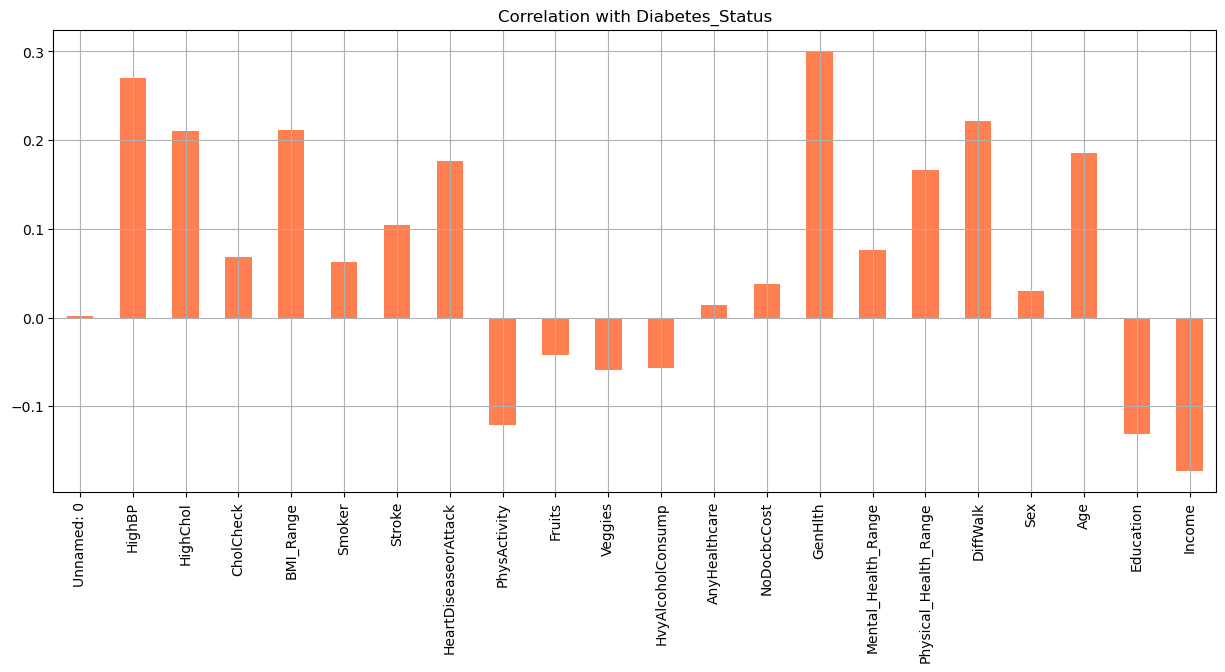

In [8]:
Diabetes_data_df.drop('Diabetes_Status', axis=1).corrwith(Diabetes_data_df.Diabetes_Status).plot(kind='bar', grid=True, figsize=(15, 6)
, title="Correlation with Diabetes_Status",color="coral");

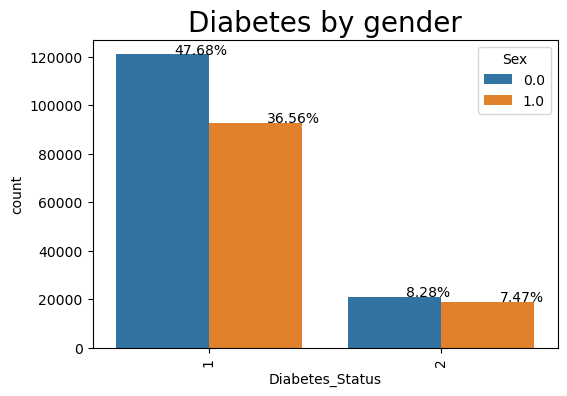

In [9]:
# Gender
plt.figure(figsize=(6,4))
x= sns.countplot(x='Diabetes_Status',data=Diabetes_data_df,hue='Sex')
plt.xticks(rotation=90)
plt.title('Diabetes by gender',fontdict={'fontsize':20})
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/Diabetes_data_df.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

<Figure size 300x200 with 0 Axes>

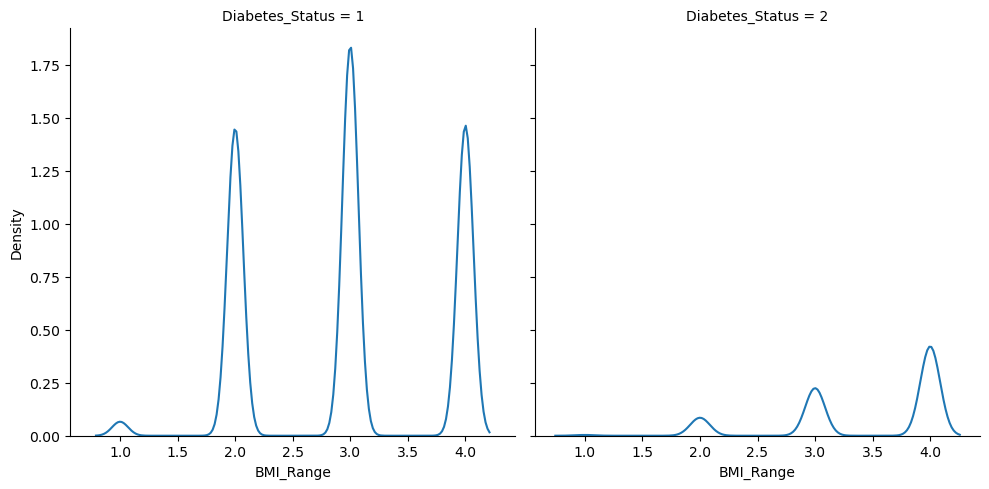

In [10]:
# BMI Binning was completed for csv file used
# BMI 1 is less than 18.5
# BMI 2  is 18.5 to 24.9,
# BMI 3  is 25.0 to 29.9
# BMI 4 is 30.0 or higher
# BMI correlation to Diabetes
plt.figure(figsize=(3,2))
sns.displot(x='BMI_Range', col='Diabetes_Status' , data = Diabetes_data_df, kind="kde" ,palette="Set2");

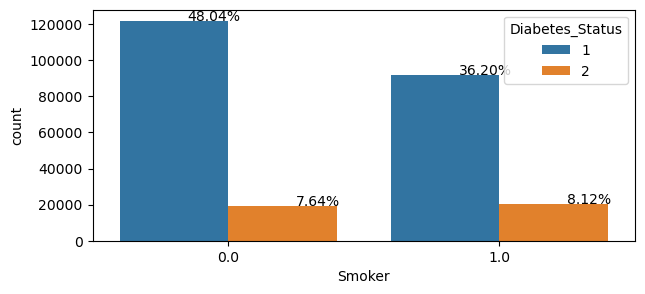

In [19]:
# Smoking correlation to Diabetes
plt.figure(figsize=(7,3))

x= sns.countplot(x='Smoker', hue='Diabetes_Status' , data = Diabetes_data_df);
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/Diabetes_data_df.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

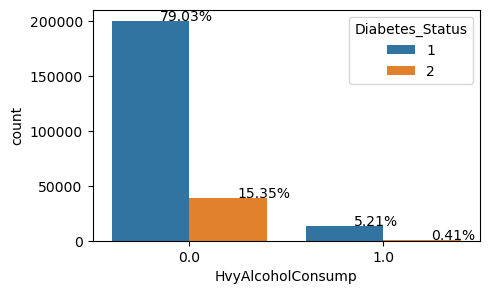

In [12]:
# Alcohol correlation to Diabetes
plt.figure(figsize=(5,3))

x= sns.countplot(x='HvyAlcoholConsump', hue='Diabetes_Status' , data = Diabetes_data_df);
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/Diabetes_data_df.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

<AxesSubplot:xlabel='Diabetes_Status', ylabel='count'>

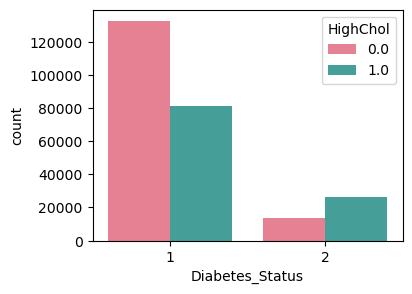

In [13]:
# Cholesterol correlation to Diabetes
# HighChol with HighBP
# binning might have caused the plots to look different
plt.figure(figsize=(4,3))
sns.countplot(data=Diabetes_data_df,x='Diabetes_Status',hue='HighChol',palette='husl')

<Figure size 600x400 with 0 Axes>

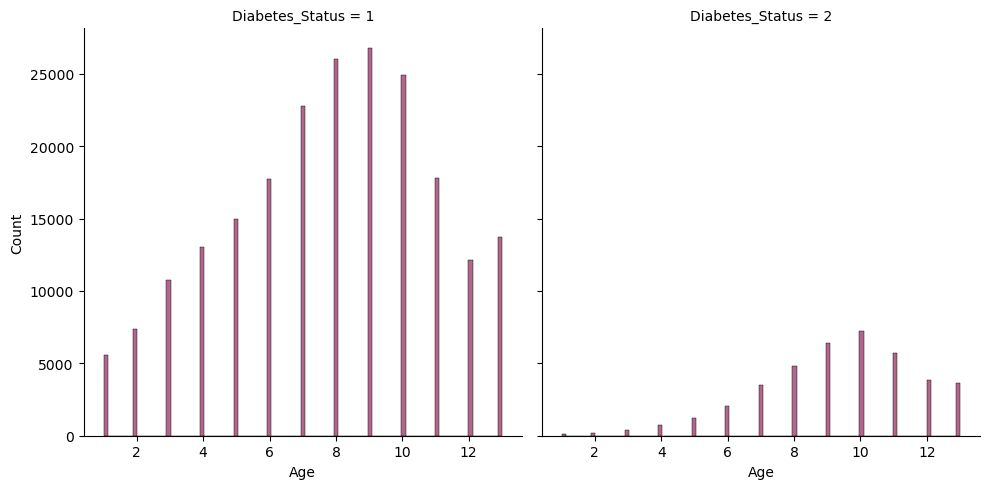

In [14]:
#Count number of each value in Age Column
#13-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older
#link to codebook here: https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf
# Age correlation to Diabetes ( for diabetics- status =2-> for 8 to 12 bin - 65 and above age) Diabetes likelihood is higher )
plt.figure(figsize=(6,4))
sns.displot(data=Diabetes_data_df,col='Diabetes_Status',x='Age',color='#993366');

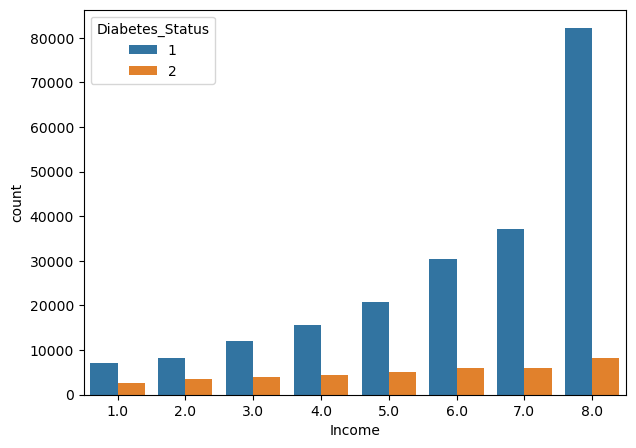

In [15]:
# Income Correlation to Diabetes 
# count of those who have higher income is much larger in the data and for those who are diabetic or prediabetic ( in same bin #2) the count of those with higher income is only slightly more) 
plt.figure(figsize=(7,5))
sns.countplot(x='Income', hue='Diabetes_Status' , data = Diabetes_data_df)
plt.show()

<Figure size 600x400 with 0 Axes>

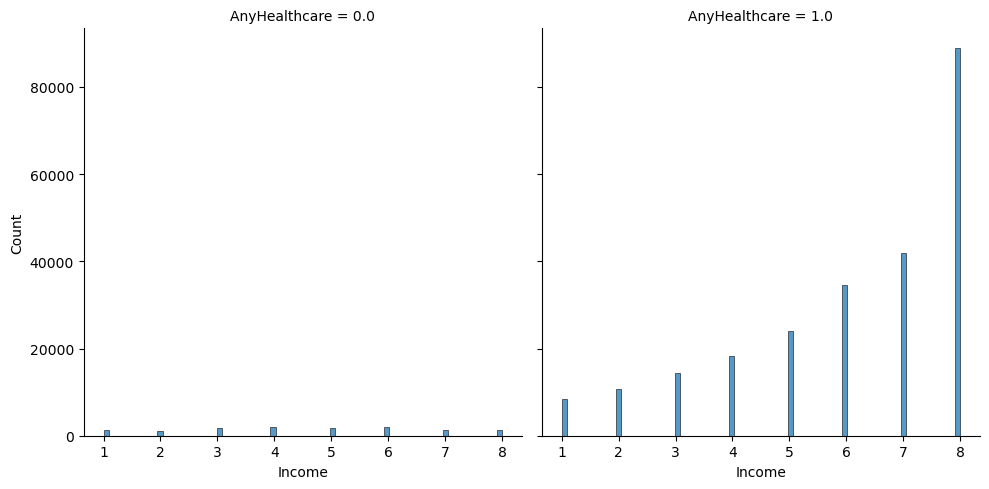

In [16]:
# #Income scale (INCOME2 see codebook) scale 1-8 1 = less than $10,000 5 = less than $35,000 8 = $75,000 or more
#Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes
# AS Income /diabetes-status did not give any indicative correlation this one looks at effect of income on healthstatus
# notice that coun to those without healthcare is much low in data sample and those with anyhealthcare - have a postive correlation with higher income
plt.figure(figsize=(6,4))
sns.displot(data=Diabetes_data_df,x='Income',col='AnyHealthcare');

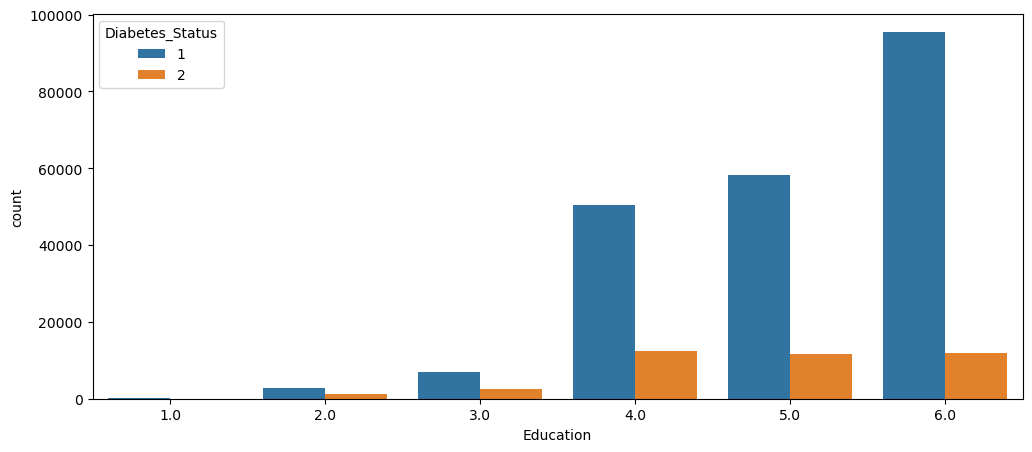

In [17]:
#Education Correlation to Diabetes
#Education level (EDUCA see codebook) scale 1-6 1 = Never attended school or only kindergarten 
#2 = Grades 1 through 8 (Elementary) 3 = Grades 9 through 11 (Some high school) 4 = Grade 12 or GED (High school graduate) 
#5 = College 1 year to 3 years (Some college or technical school) 6 = College 4 years or more (College graduate)
plt.figure(figsize=(12,5))
sns.countplot(x='Education', hue='Diabetes_Status' , data = Diabetes_data_df)
plt.show()

In [18]:
# Use of plotly instead of sns to get horizontal bar graph for BMI_range, Age,smoking, alcohol, cholestrol and HTN
# need to also look for correlation using plotly
# df = Diabetes_data_df
# fig = px.bar(df, x="Diabetes_Status", y="BMI_Range", orientation='h')
# fig.show()